In [1]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('winequality-white.csv', sep=';')

### Red wine Principal component analysis

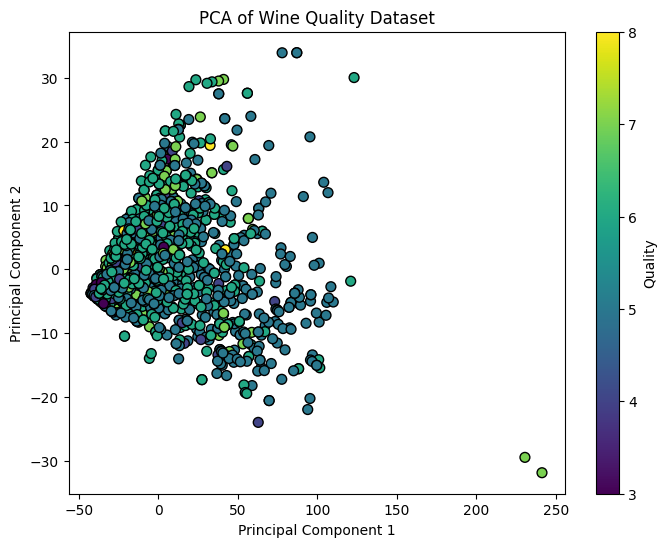

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(red_wine_data.drop('quality', axis=1).values)
y = red_wine_data['quality'].values

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Wine Quality Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Quality')
plt.show()

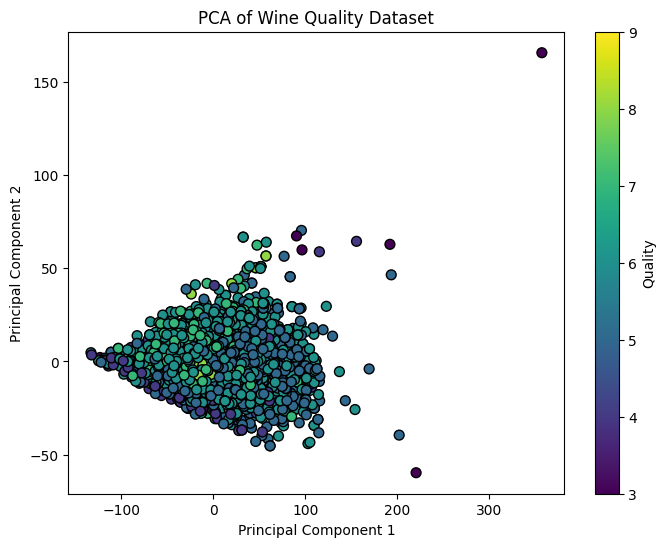

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(white_wine_data.drop('quality', axis=1).values)
y = white_wine_data['quality'].values

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Wine Quality Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Quality')
plt.show()

People prefer much more the red wine in Portugal, interesting. Moreover, the red one has more spread along the value. Finally, there are some global outliers in both case.

Now, I will try to put together the two datasets and see the PCA.

In [5]:
red_wine_data['type'] = 0
white_wine_data['type'] = 1

wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

X = wine_data.drop(columns=['quality', 'type'])
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [6]:
# I want to scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Exploratory Data Analysis (EDA):
Number of samples: 6497
Number of features: 11
Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


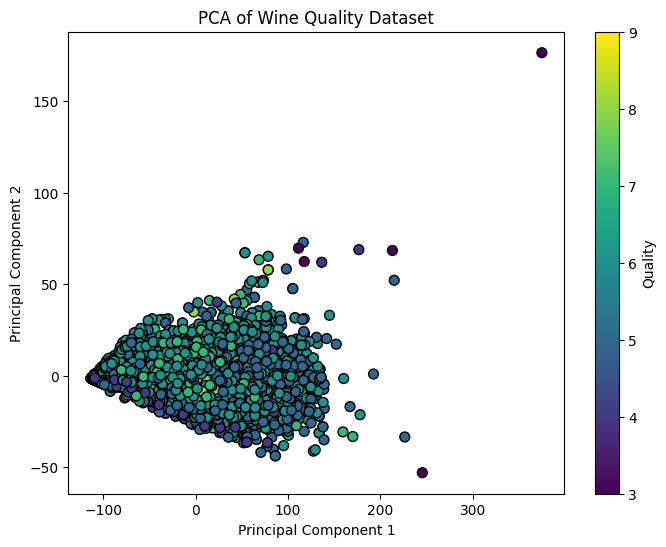

In [7]:
# I want to do exploratory data analysis (EDA) on the dataset
print("Exploratory Data Analysis (EDA):")
print("Number of samples:", len(wine_data))
print("Number of features:", X.shape[1])
print("Feature names:", X.columns.tolist())

# Plot the Principal Component Analysis (PCA) of the dataset


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA of Wine Quality Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Quality')
plt.show()


What is interesting is that now the spread is decreased, this is due to the fact that samples of white wine are 4x more the ones from the red wine, so, a possible strategy would be to balance the dataset removing some samples from white wine dataset, in a way to have a distribution of 50% red saples and 50% white sample.

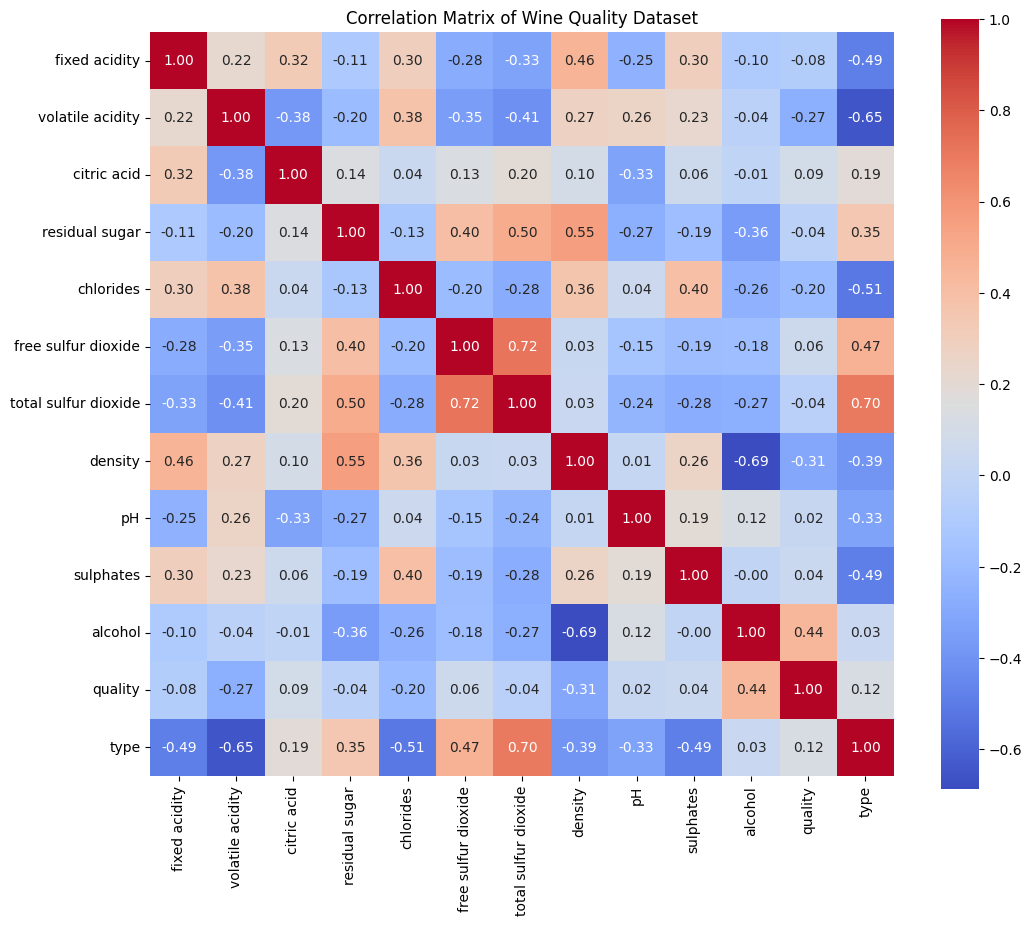

In [8]:
# Now I want to see the correlation between the features
correlation_matrix = wine_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Wine Quality Dataset")
plt.show()

Text(0.5, 1.02, 'Pairplot of Wine Quality Dataset')

<Figure size 1200x1000 with 0 Axes>

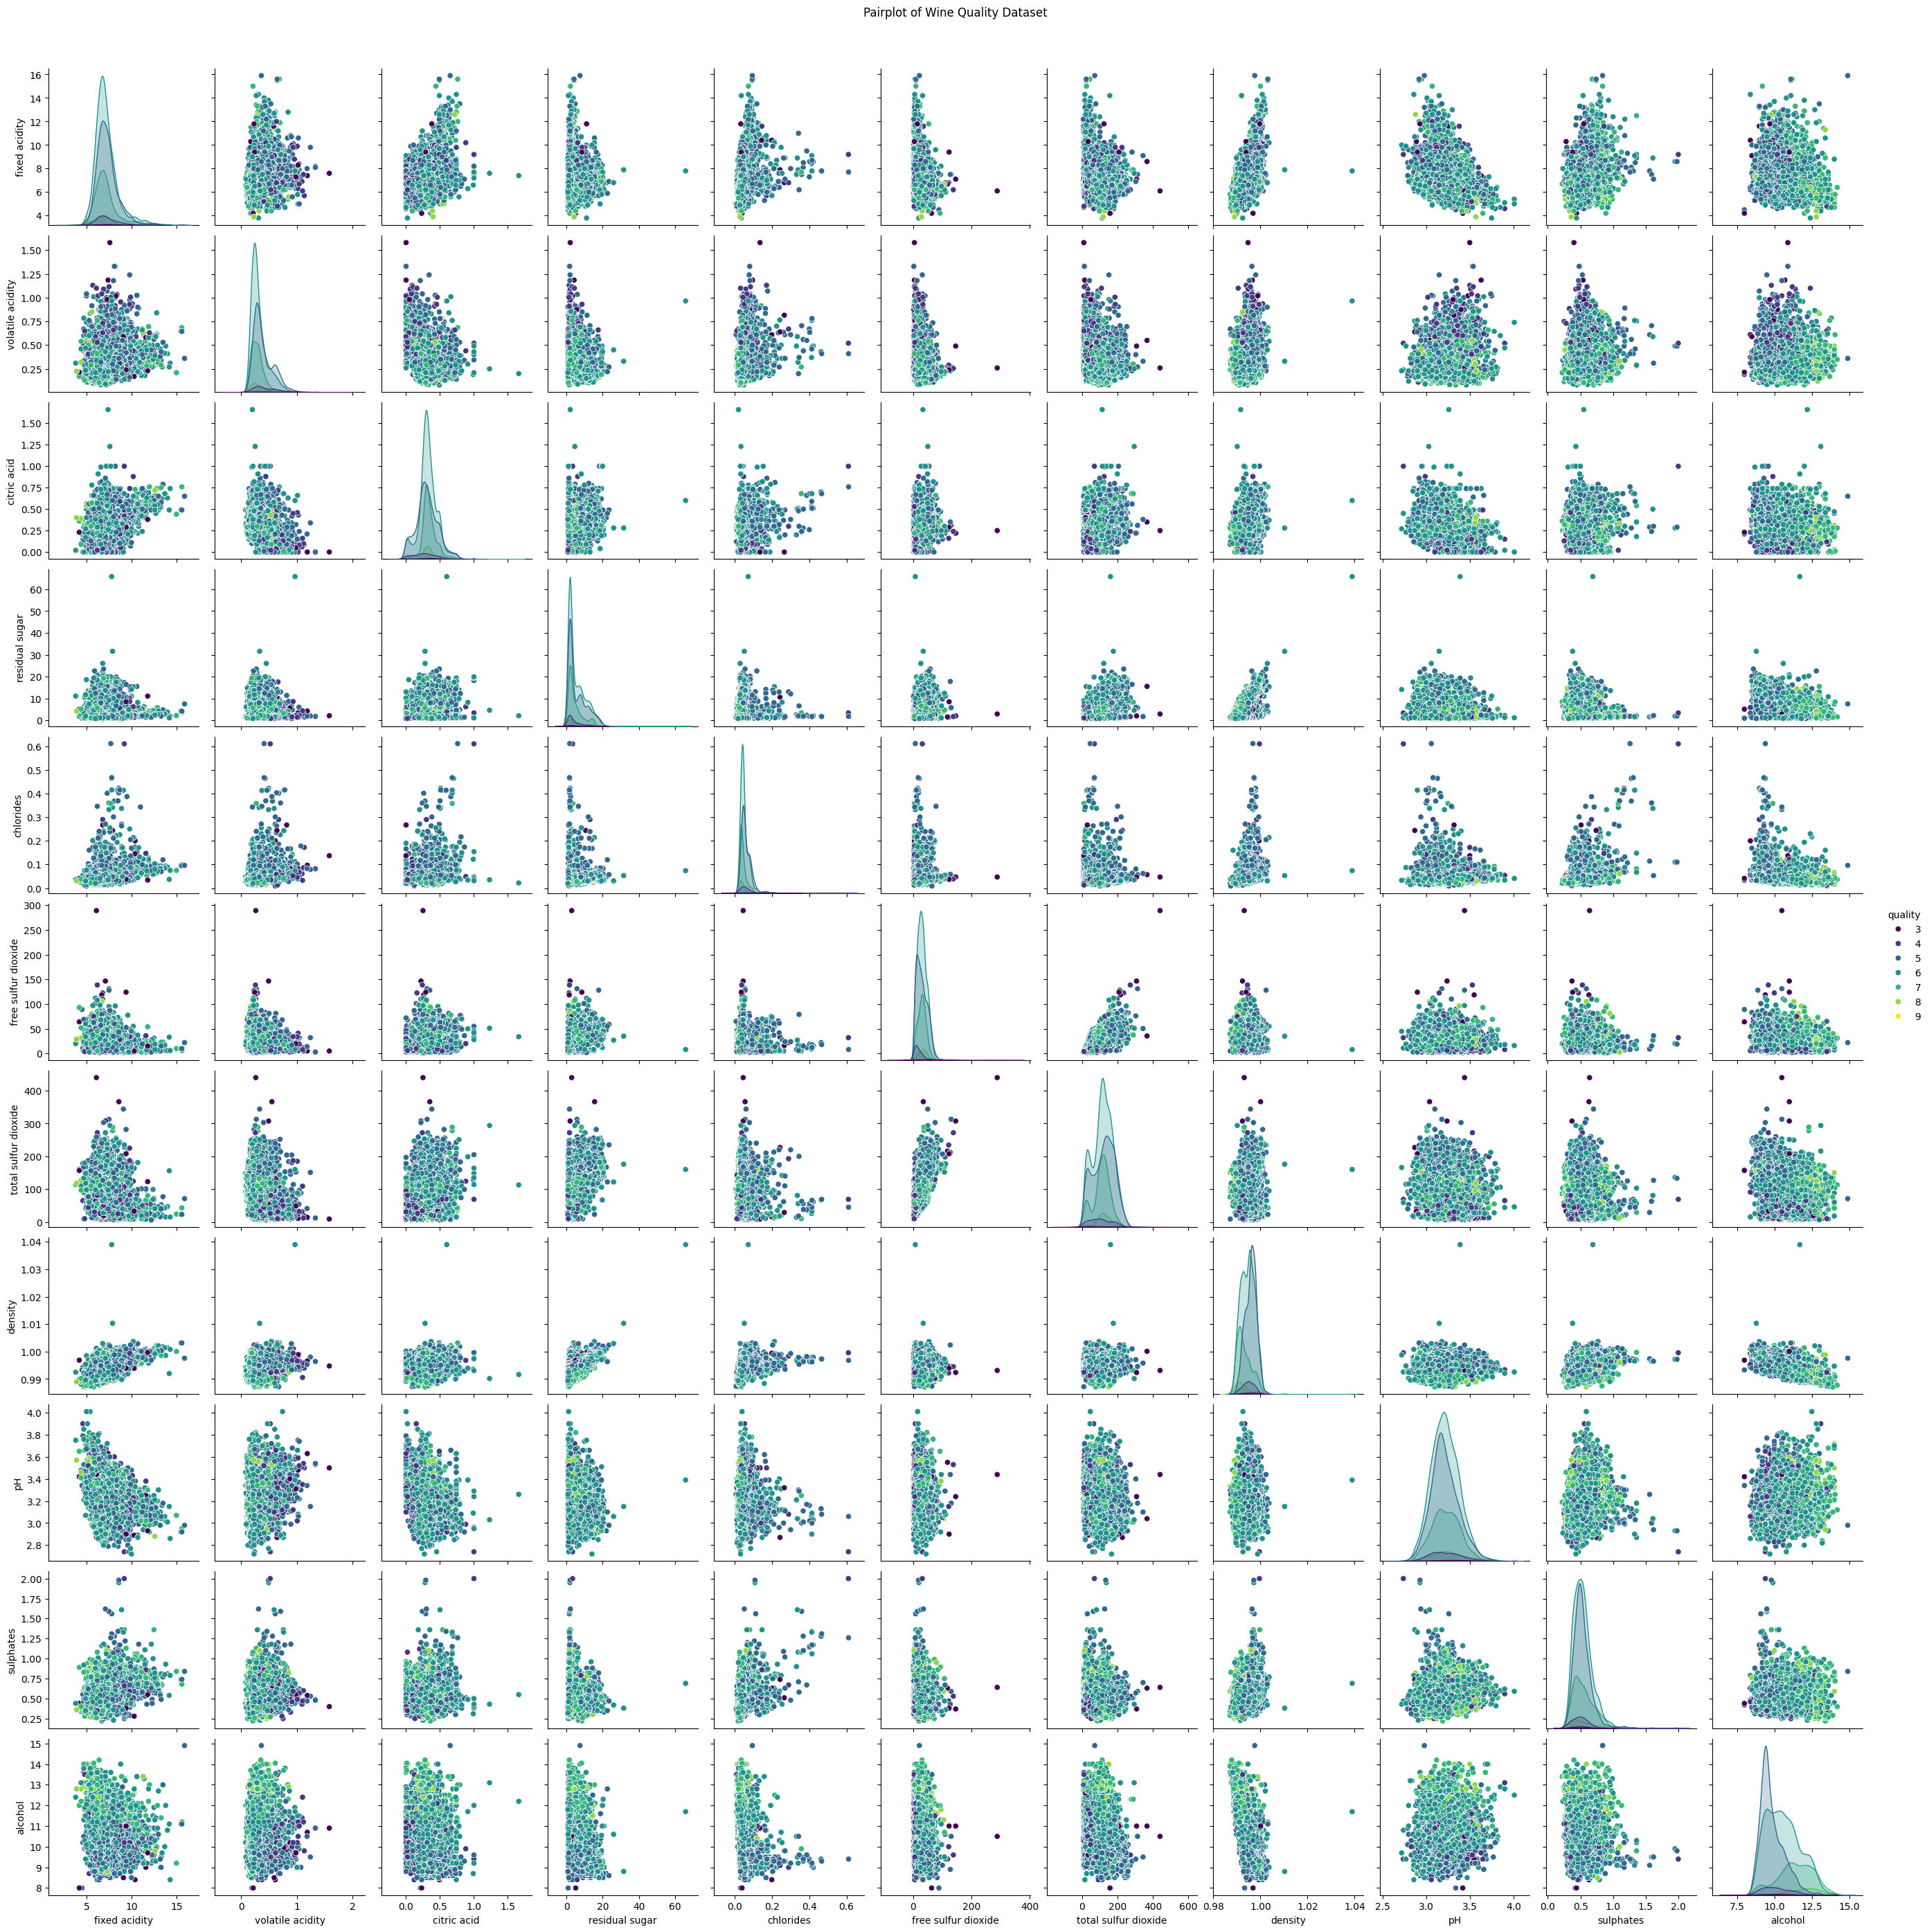

In [9]:
# I want to use the one that shows the distribution of a variable in the correlation matrix
plt.figure(figsize=(12, 10))
sns.pairplot(wine_data, hue='quality', vars=X.columns, palette='viridis')
plt.suptitle("Pairplot of Wine Quality Dataset", y=1.02)

In [11]:
threshold = 0.5
highly_correlated_features = set()
pca_full = PCA(n_components=None)
# Scale the data before fitting PCA
X_scaled = scaler.fit_transform(X)
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'feature': X.columns,
    'explained_variance': explained_variance *100
})
explained_variance_df = explained_variance_df.sort_values(by='explained_variance', ascending=False)
print("Varianza spiegata da ciascuna feature (PCA):")
pd.set_option('display.float_format', '{:.6f}'.format)
print(explained_variance_df)

Varianza spiegata da ciascuna feature (PCA):
                 feature  explained_variance
0          fixed acidity           27.544260
1       volatile acidity           22.671146
2            citric acid           14.148609
3         residual sugar            8.823201
4              chlorides            6.544317
5    free sulfur dioxide            5.521016
6   total sulfur dioxide            4.755989
7                density            4.559184
8                     pH            3.063855
9              sulphates            2.069961
10               alcohol            0.298462
